In [1]:
# evaluate training time and evaluation time
# over the input sequence length
import time
import numpy as np
import rmm.esn as esn
import rmm.rmm as rmm

# set up hyper-parameters of the experiment
models   = ['ESN', 'ESGRU', 'RMM']
repeats  = 20
lengths  = [50, 100, 200, 300, 500, 1000]
m        = 128
K        = 16
n        = 8

training_times   = np.zeros((len(models), len(lengths), repeats))
prediction_times = np.zeros((len(models), len(lengths), repeats))

for l in range(len(lengths)):
    print('--- length %d --- ' % lengths[l])
    # generate an input and an output sequence, where
    # the output is the input shifted by 1
    X = np.tile(np.round(np.random.rand(2, n)), (int(lengths[l]/2), 1))
    Y = np.zeros((lengths[l], n))
    Y[:lengths[l]-1, :] = X[1:lengths[l], :]
    # iterate over all model types
    for j in range(len(models)):
        print('training %s' % models[j])
        # train and predict with each model repeats times
        for r in range(repeats):
            # training
            start = time.time()
            if models[j] == 'ESN':
                model = esn.ESN(m = m)
            elif models[j] == 'ESGRU':
                model = esn.ESGRU(m = m)
            elif models[j] == 'RMM':
                model = rmm.RMM(m = m, K = K)
            model.fit(X, Y)
            training_times[j, l, r] = time.time() - start
            # prediction
            start = time.time()
            model.predict(X)
            prediction_times[j, l, r] = time.time() - start

/usr/lib64/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


--- length 50 --- 
training ESN
training ESGRU
training RMM
--- length 100 --- 
training ESN
training ESGRU
training RMM
--- length 200 --- 
training ESN
training ESGRU
training RMM
--- length 300 --- 
training ESN
training ESGRU
training RMM
--- length 500 --- 
training ESN
training ESGRU
training RMM
--- length 1000 --- 
training ESN
training ESGRU
training RMM


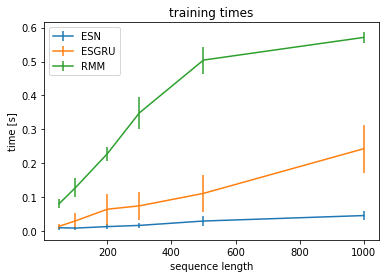

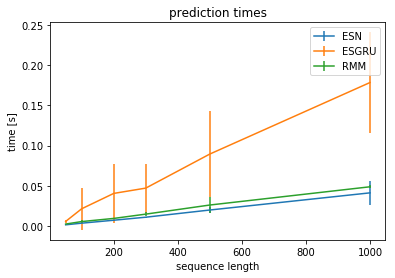

In [4]:
# plot results
import matplotlib.pyplot as plt
for j in range(len(models)):
    plt.errorbar(lengths, np.mean(training_times[j, :, :], axis=1), yerr = np.std(training_times[j, :, :], axis=1), label=models[j])
plt.legend()
plt.xlabel('sequence length')
plt.ylabel('time [s]')
plt.title('training times')
plt.show()

for j in range(len(models)):
    plt.errorbar(lengths, np.mean(prediction_times[j, :, :], axis=1), yerr = np.std(prediction_times[j, :, :], axis=1), label=models[j])
plt.legend()
plt.xlabel('sequence length')
plt.ylabel('time [s]')
plt.title('prediction times')
plt.show()